# **IN Vehickle Coupon Recommendation**

# **Importing the Libraries**
This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver.

In [46]:
# Importing pandas as pd
import pandas as pd
# Importing matplotlib as mt
import matplotlib as mt
# Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
# Importing StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
# Importing OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder
# Importing make_imbalance from imblearn
from imblearn.datasets import make_imbalance
# Importing matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns
# Importing counter from collection
from collections import Counter
# Importing matplotlib
import matplotlib

# **Loading the dataset**

In [47]:
# loading the dataset in csv from to data variable
data = pd.read_csv('vehicle-coupon.csv')
# to print the loaded dataset
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


# **Pre-Processing and Cleaning the data**

In [48]:
# Here we are dropping the two column by using drop function
data.drop(['car','toCoupon_GEQ5min'], axis=1, inplace=True)

In [49]:
# to print first 5 rows of dataset we use head command
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,0


In [50]:
# the command to check the types of data is
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [51]:
# cleanup is used here to convert the datapytes
cleanup = {"gender": {"Female":0, "Male":1},
           "destination": {"No Urgent Place":0, "Home":1, "Work":2},
           "passanger": {"Alone":0, "Friend(s)":1, "Kid(s)":2, "Partner":3},
           "weather": {"Sunny":0, "Rainy":1, "Snowy":2},
           "time": {"2PM":0, "10AM":1, "10PM":2, "6PM":3, "7AM":4},
           "expiration": {"1d":0, "2h":1},
           "maritalStatus": {"Unmarried partner":0, "Single":1, "Divorced":2, "Widowed":3, "Married partner":4},
           "coupon": {"Restaurant(<20)":0, "Coffee House":1, "Carry out & Take away":2, "Restaurant(20-50)":3, "Bar":4},
           #"education": {"Some college - no degree":0, "Bachelors degree":1, "Associates degree":2, "High School Graduate":3, "Graduate degree (Masters or Doctorate)":4},
           "income": {"$37500 - $49999":0, "$62500 - $74999":1, "$12500 - $24999":2, "$75000 - $87499":3, "$50000 - $62499":4, "$25000 - $37499":5, "$100000 or More":6, "$87500 - $99999":7, "Less than $12500":8},
            "Bar": {"never": 0, "less1":1, "1~3":2, "gt8":3, "4~8":4},
           "CoffeeHouse": {"never":0, "less1":1, "4~8":2, "1~3":3, "gt8":4, "nan":5},
           "age": {"21":0, "46":1, "26":2, "31":3, "41":4, "50plus":5, "36":6, "below21":7},
           "CarryAway": {"4~8":0, "1~3":1, "gt8":2, "less1":3, "never":4},
           "RestaurantLessThan20": {"4~8":0, "1~3":1, "less1":2, "gt8":3, "never":4},
           "Restaurant20To50": {"4~8":0, "1~3":1, "less1":2, "gt8":3, "never":4, "nan":5}

          }
data.replace(cleanup, inplace=True)
# to print first 5 rows of dataset we use head command
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,0,0,55,0,0,0,0,0,0,1,Some college - no degree,Unemployed,0,0.0,0.0,NaN,0.0,1.0,0,0,0,1,1
1,0,1,0,80,1,1,1,0,0,0,1,Some college - no degree,Unemployed,0,0.0,0.0,NaN,0.0,1.0,0,0,0,1,0
2,0,1,0,80,1,2,1,0,0,0,1,Some college - no degree,Unemployed,0,0.0,0.0,NaN,0.0,1.0,1,0,0,1,1
3,0,1,0,80,0,1,1,0,0,0,1,Some college - no degree,Unemployed,0,0.0,0.0,NaN,0.0,1.0,1,0,0,1,0
4,0,1,0,80,0,1,0,0,0,0,1,Some college - no degree,Unemployed,0,0.0,0.0,NaN,0.0,1.0,1,0,0,1,0


In [52]:
# get_dummies is used as one-hot encode for categorical data
data=pd.get_dummies(data)
# to print first 5 rows of dataset we use head command
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,0,0,0,55,0,0,0,0,0,0,1,0,0.0,0.0,NaN,0.0,1.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,80,1,1,1,0,0,0,1,0,0.0,0.0,NaN,0.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,80,1,2,1,0,0,0,1,0,0.0,0.0,NaN,0.0,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,80,0,1,1,0,0,0,1,0,0.0,0.0,NaN,0.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,80,0,1,0,0,0,0,1,0,0.0,0.0,NaN,0.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
#filling the missinf values with mod
mod = data.mode()['CarryAway']
print(mod[0])
data['CarryAway'].fillna(mod[0], inplace=True)

1.0


In [54]:
#filling the missinf values with mod
mod = data.mode()['Bar']
print(mod[0])
data['Bar'].fillna(mod[0], inplace=True)

0.0


In [55]:
#filling the missinf values with mod
mod = data.mode()['CoffeeHouse']
print(mod[0])
data['CoffeeHouse'].fillna(mod[0], inplace=True)

1.0


In [56]:
#filling the missinf values with mod
mod = data.mode()['Restaurant20To50']
print(mod[0])
data['Restaurant20To50'].fillna(mod[0], inplace=True)

2.0


In [57]:
#filling the missinf values with mod
mod = data.mode()['RestaurantLessThan20']
print(mod[0])
data['RestaurantLessThan20'].fillna(mod[0], inplace=True)

1.0


In [58]:
# here we used isnull for checking any null value is present or not
data.isnull().sum(axis = 0)

destination                                             0
passanger                                               0
weather                                                 0
temperature                                             0
time                                                    0
coupon                                                  0
expiration                                              0
gender                                                  0
age                                                     0
maritalStatus                                           0
has_children                                            0
income                                                  0
Bar                                                     0
CoffeeHouse                                             0
CarryAway                                               0
RestaurantLessThan20                                    0
Restaurant20To50                                        0
toCoupon_GEQ15

In [59]:
# the command to check the types of data is
data.dtypes

destination                                               int64
passanger                                                 int64
weather                                                   int64
temperature                                               int64
time                                                      int64
coupon                                                    int64
expiration                                                int64
gender                                                    int64
age                                                       int64
maritalStatus                                             int64
has_children                                              int64
income                                                    int64
Bar                                                     float64
CoffeeHouse                                             float64
CarryAway                                               float64
RestaurantLessThan20                    

In [60]:
# to print first 5 rows of dataset we use head command
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,0,0,0,55,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,80,1,1,1,0,0,0,1,0,0.0,0.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,80,1,2,1,0,0,0,1,0,0.0,0.0,1.0,0.0,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,80,0,1,1,0,0,0,1,0,0.0,0.0,1.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,80,0,1,0,0,0,0,1,0,0.0,0.0,1.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


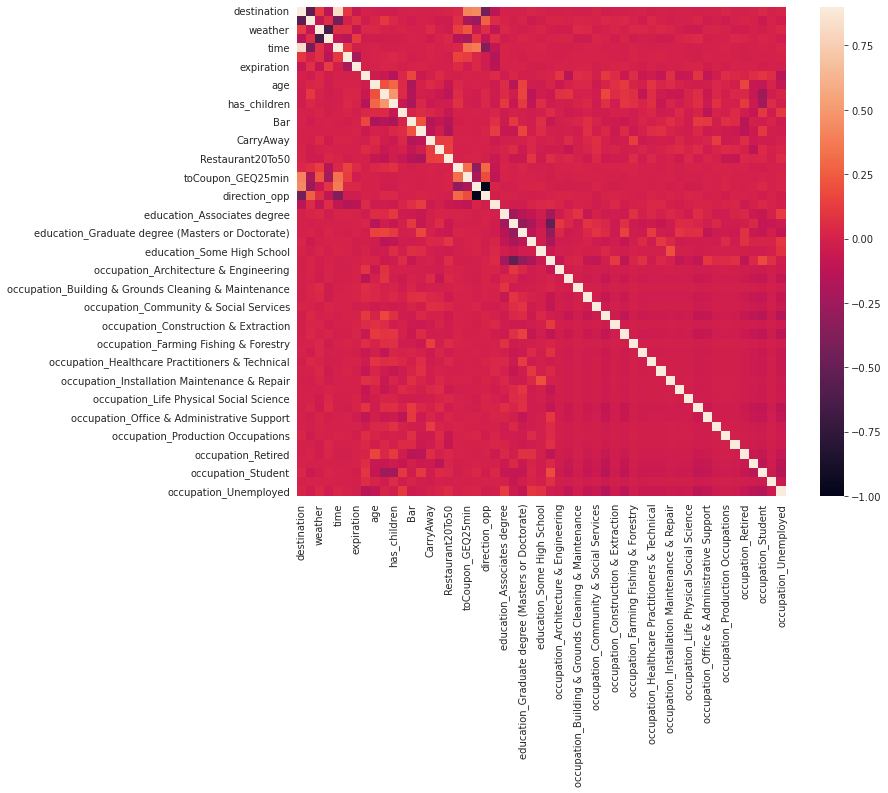

In [61]:
# this is the code for plotting the heat map
color = sns.color_palette()
sns.set_style('darkgrid')
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [62]:
# to count the number of each class in attribute we use value_counts
data.Y.value_counts()

1    7210
0    5474
Name: Y, dtype: int64

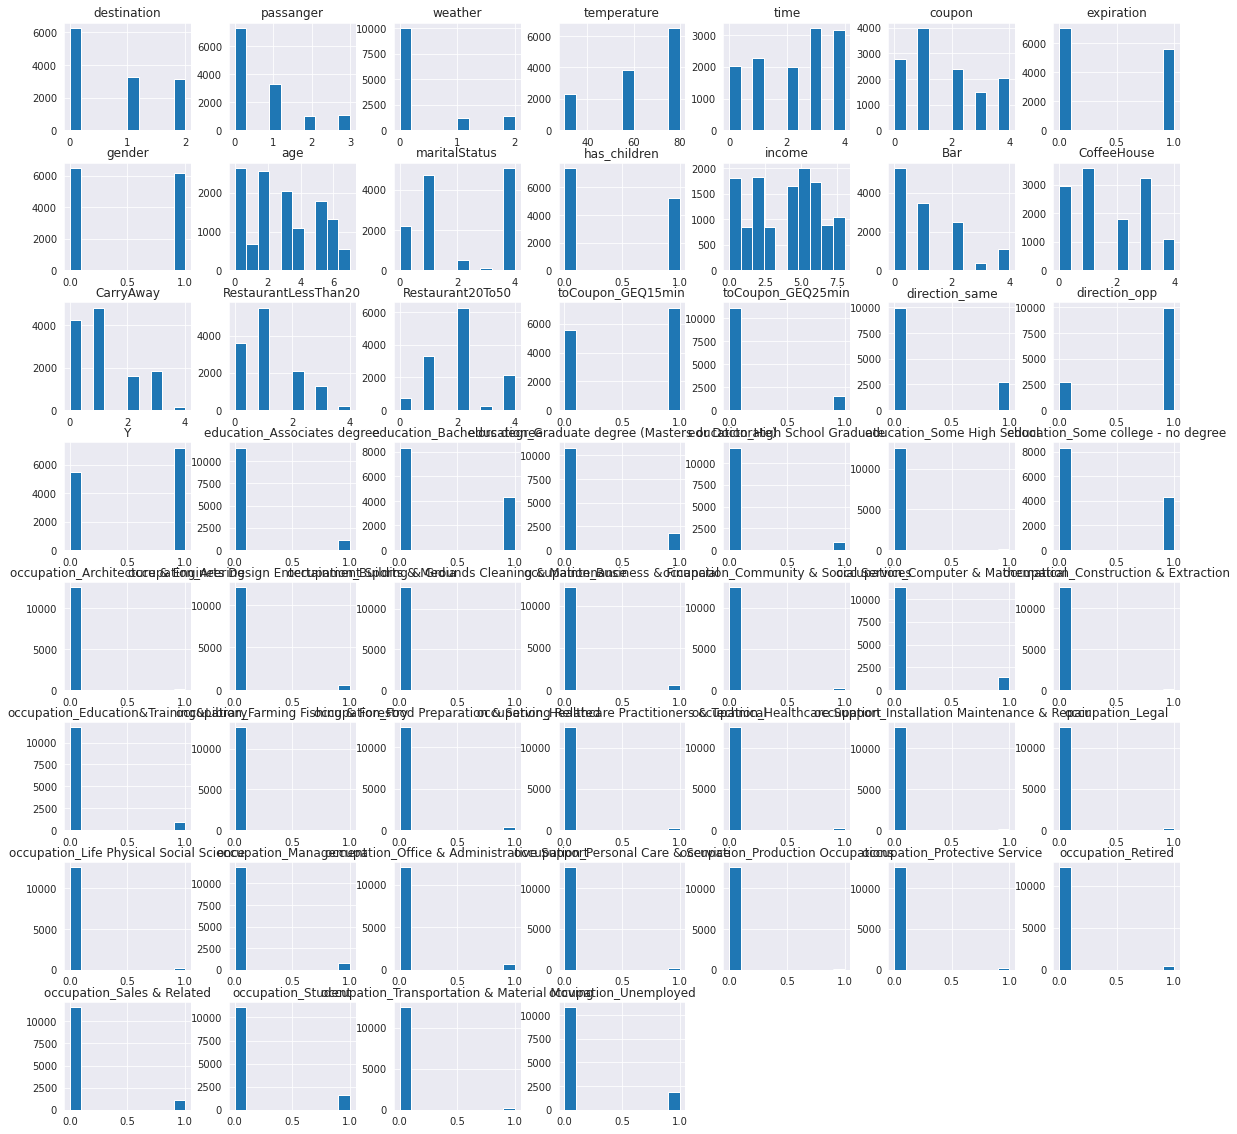

In [63]:
# Plotting histograms for all the attributes of dataset
data.hist(figsize = (20,20))
# To show the plotted histogram
plt.show()

In [66]:
# copying the data of heart disease to y variable
y = data['Y'].copy()
# dropping the heart disease attribute from dataset and storing it in x variable
x = data.drop(['Y'], axis = 1)
# printing the number of class present in y with their time of occurance
print(f'Distribution Before Imblancing : {Counter(y)}')

Distribution Before Imblancing : Counter({1: 7210, 0: 5474})


In [65]:
#Calculating hte imbalance percentage in the dataset
imbalance = len(data[data['Y'] == 0])/len(data)*100
imbalance

43.15673289183223

<function matplotlib.pyplot.show>

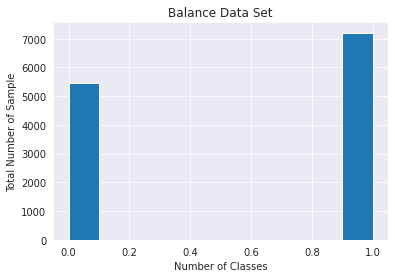

In [67]:
# plotting the histogram for low imbalancing
hist = data['Y'].hist()
# tile of histogram
plt.title('Balance Data Set')
# label for x-axis
plt.xlabel('Number of Classes')
# label for y-axis
plt.ylabel('Total Number of Sample')
# to display histogram
plt.show

In [80]:
# saving the figure in pdf format of hist
fig= hist.get_figure()
fig.savefig('Hist_Main.jpg')

# **Low imblance**
**The dataset over here is 65% Imbalanced**

In [70]:
# making the data imbalance by 65% and storing it in XA and YA
XA, YA = make_imbalance(x, y, 
                          sampling_strategy={1: 7210, 0: 3882},
                        random_state = 42)
# printing the count after low imbalancing
print(f'Distribution After Imblancing 65%: {Counter(YA)}')

Distribution After Imblancing 65%: Counter({1: 7210, 0: 3882})


<function matplotlib.pyplot.show>

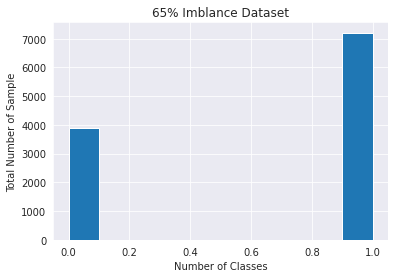

In [71]:
# plotting the histogram for low imbalancing
hist1 = YA.hist()
# tile of histogram
plt.title('65% Imblance Dataset')
# label for x-axis
plt.xlabel('Number of Classes')
# label for y-axis
plt.ylabel('Total Number of Sample')
# to display histogram
plt.show

In [72]:
# saving the figure in pdf format of hist1
fig= hist1.get_figure()
fig.savefig('Hist_65%.pdf')

# **Medium Imblance**
**The dataset over here is 75% Imbalanced**

In [73]:
# making the data imbalance by 75% and storing it in XB and YB
XB, YB = make_imbalance(x, y, 
                          sampling_strategy={1: 7210, 0: 2403},
                        random_state = 42)
# printing the count after medium imbalancing
print(f'Distribution After Imblancing 75% : {Counter(YB)}')

Distribution After Imblancing 75% : Counter({1: 7210, 0: 2403})


<function matplotlib.pyplot.show>

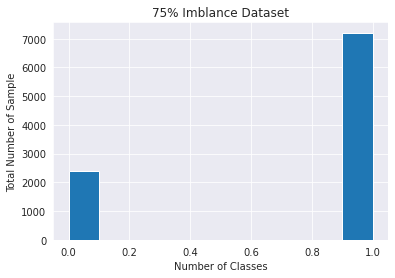

In [74]:
# plotting the histogram for low imbalancing
hist2 = YB.hist()
# tile of histogram
plt.title('75% Imblance Dataset')
# label for x-axis
plt.xlabel('Number of Classes')
# label for y-axis
plt.ylabel('Total Number of Sample')
# to display histogram
plt.show

In [75]:
# saving the figure in pdf format of hist1
fig= hist2.get_figure()
fig.savefig('Hist_75%.pdf')

# **High Imbalance**
**The dataset over here is 90% Imbalanced**

In [76]:
# making the data imbalance by 90% and storing it in XC and YC
XC, YC = make_imbalance(x, y, 
                          sampling_strategy={1: 7210, 0: 801},
                        random_state = 42)
# printing the count after High imbalancing
print(f'Distribution After Imblancing 90% : {Counter(YC)}')

Distribution After Imblancing 90% : Counter({1: 7210, 0: 801})


<function matplotlib.pyplot.show>

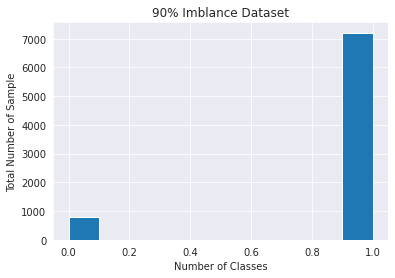

In [77]:
# plotting the histogram for low imbalancing
hist3 = YC.hist()
# tile of histogram
plt.title('90% Imblance Dataset')
# label for x-axis
plt.xlabel('Number of Classes')
# label for y-axis
plt.ylabel('Total Number of Sample')
# to display histogram
plt.show

In [79]:
# saving the figure in pdf format of hist1
fig= hist3.get_figure()
fig.savefig('Hist_90%.jpg')